# Index

[Deep Gravity](#Deep-Gravity)

[No Outliers](#No-Outliers)

[Outliers](#Outliers)

In [1]:
%%time
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sbrn
import matplotlib as mpl
from copy import deepcopy,copy
from ipywidgets import IntProgress
from itertools import chain
from IPython.display import display
from datetime import datetime
import pickle
import os

states=['New York','Massachusetts','California','Florida','Washington','Texas']

CPU times: user 931 ms, sys: 1.2 s, total: 2.13 s
Wall time: 779 ms


### Plot settings

In [2]:
import plots as p

ModuleNotFoundError: No module named 'plots'

In [3]:
from matplotlib import font_manager

font_dirs = ['Plots/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    print(font_file)
    font_manager.fontManager.addfont(font_file)
plt.rc('font', family='Arial')
plt.rcParams['font.family'] = 'Arial'

print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.right: True
axes.spines.

In [4]:
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/crosextra/Caladea-Regular.ttf',
 '/usr/share/fonts/truetype/lato/Lato-Medium.ttf',
 '/usr/share/fonts/opentype/cantarell/Cantarell-Thin.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-BoldItalic.otf',
 '/usr/share/fonts/truetype/roboto/unhinted/RobotoTTF/Roboto-Medium.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',
 '/usr/share/fonts/opentype/linux-libertine/LinLibertine_RB.otf',
 '/usr/share/fonts/truetype/lato/Lato-Light.ttf',
 '/usr/share/fonts/truetype/gentium-basic/GenBasI.ttf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyretermes-italic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman12-regular.otf',
 '/usr/share/fonts/truetype/noto/NotoSerifDogra-Regular.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman10-regular.otf',
 '/usr/share/fonts/opentype/stix-word/STIXMath-Regular.otf',
 '/usr/share/fonts/truetype/noto/NotoMusic-Regular.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansLinearA-Regular.ttf',
 '/usr/shar

# Deep Gravity

NameError: name 'color_dict' is not defined

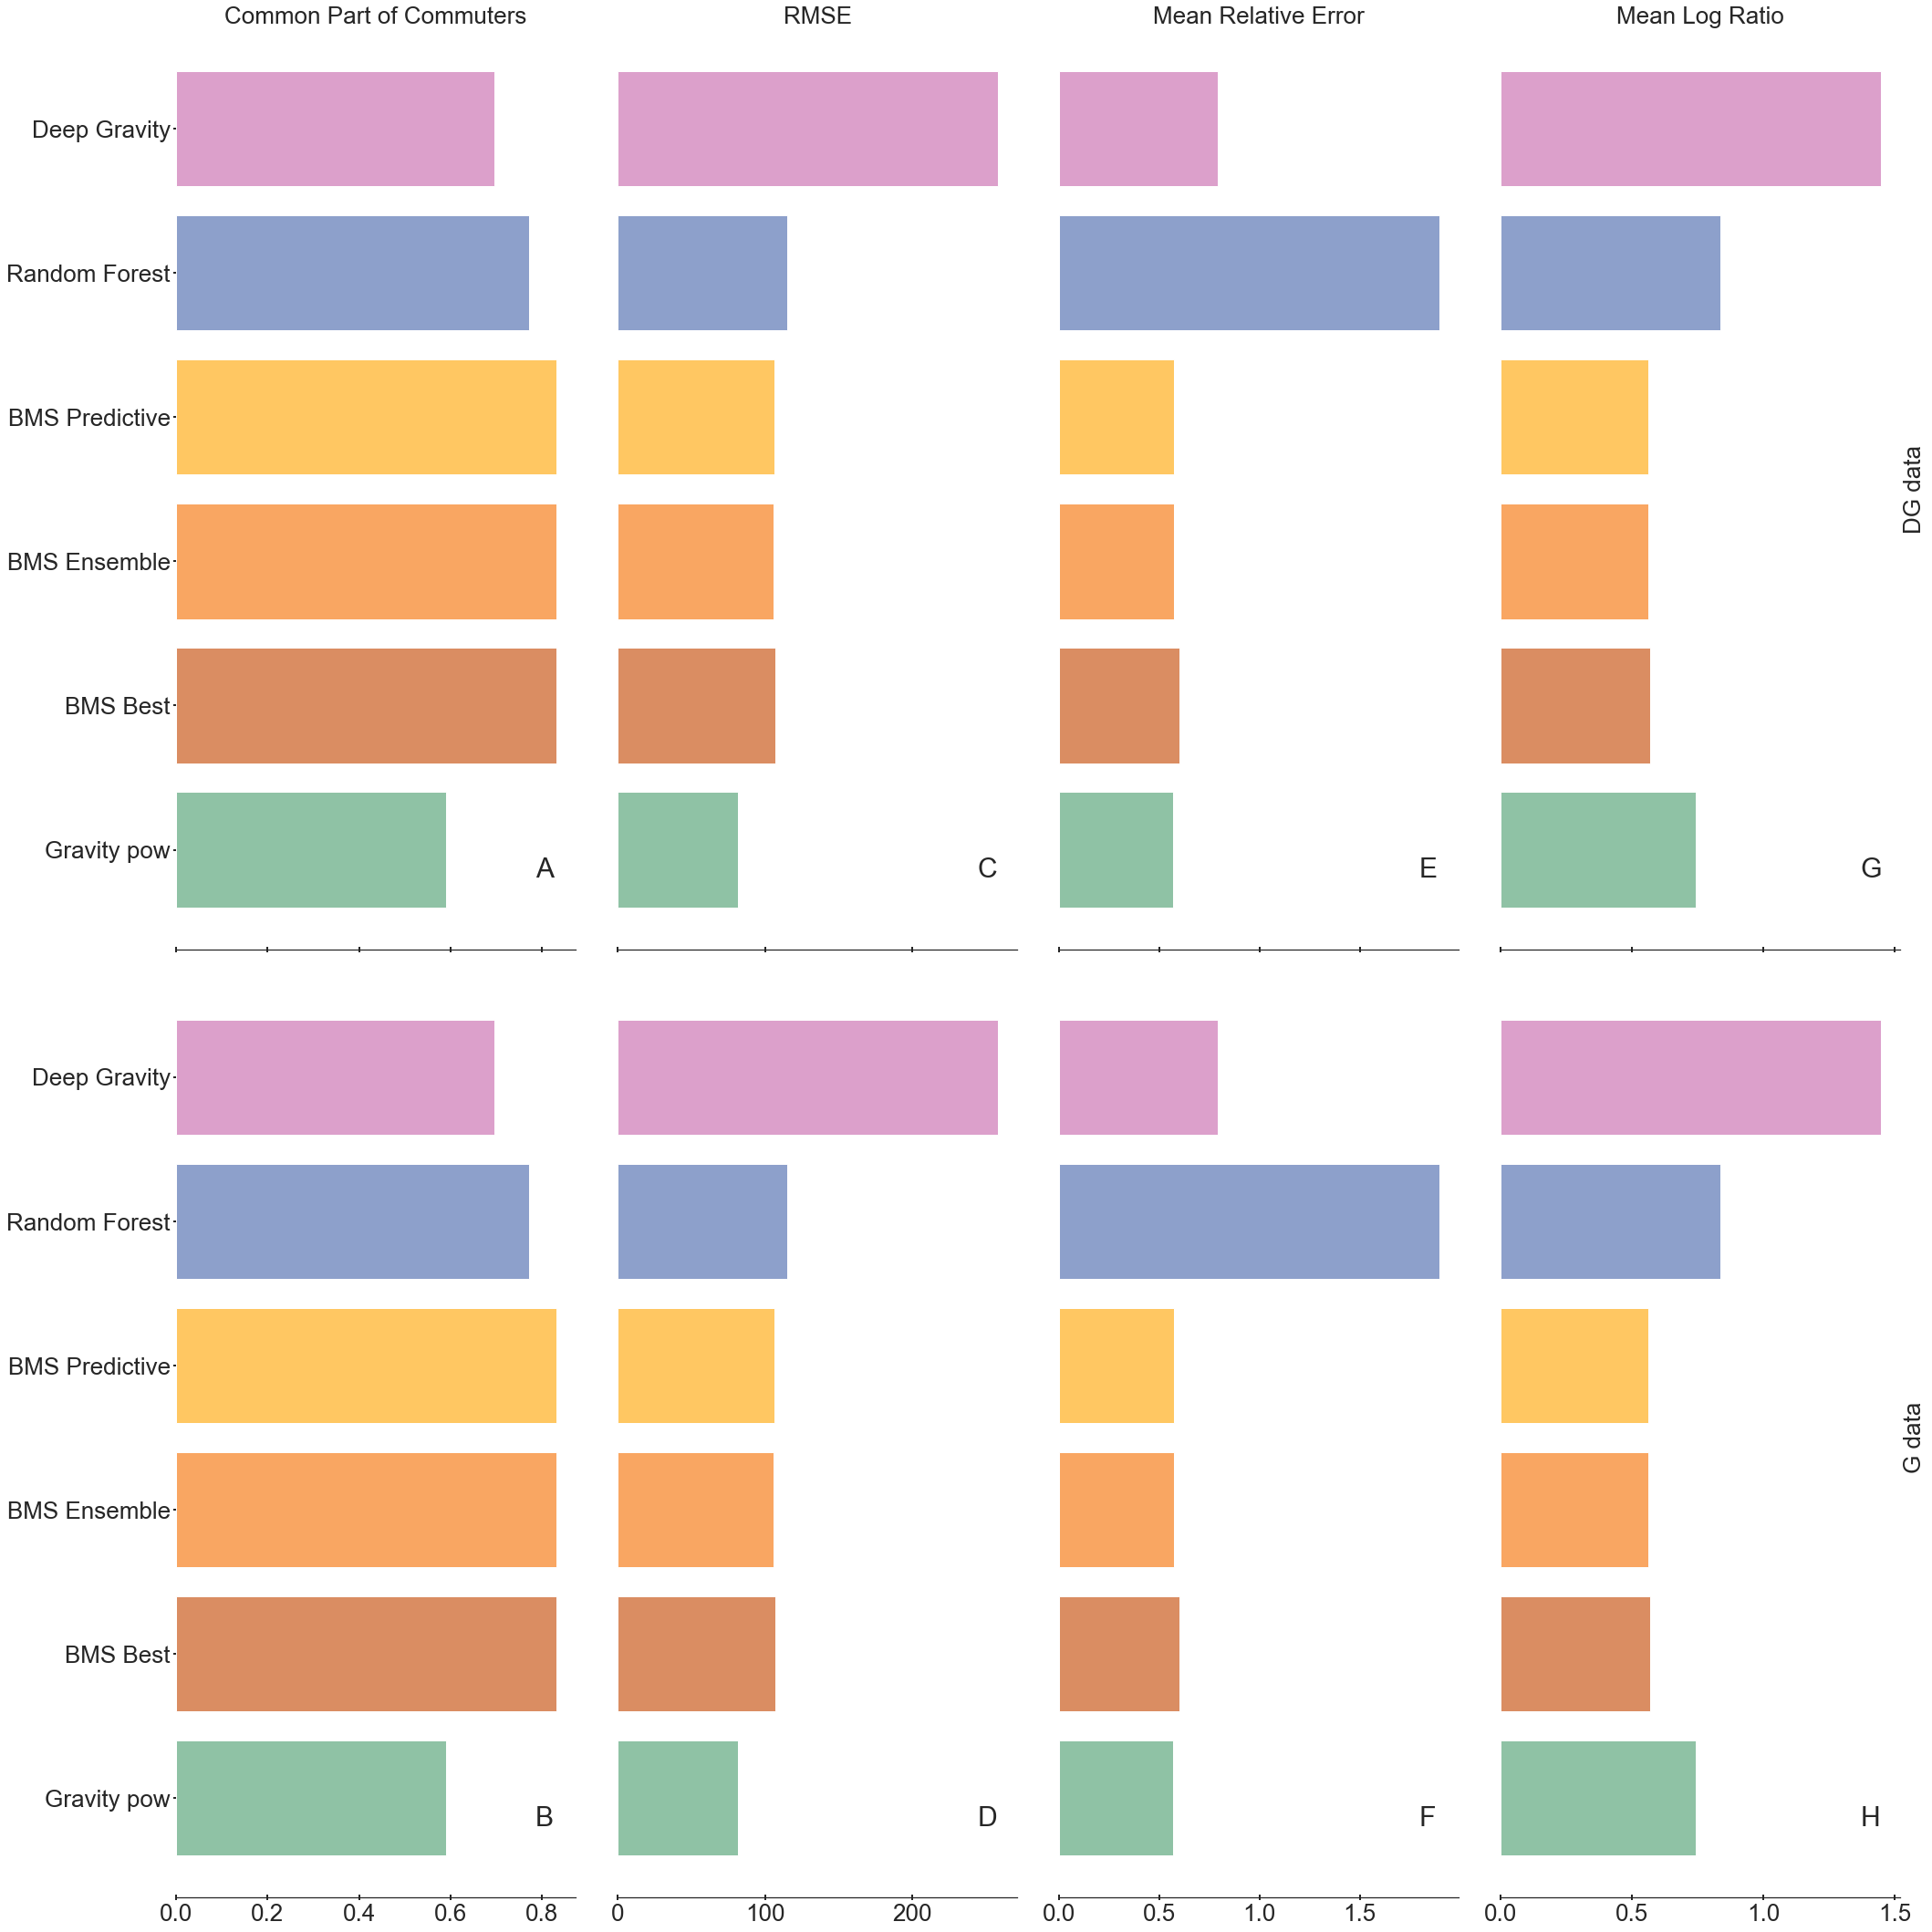

In [6]:
DG_res=pd.read_pickle('./DeepGravity-v.1.0.0(2)/deepgravity/df_DG_fold_test_2_2022_11_08-05_06_39.pkl')
name=open('./DeepGravity-v.1.0.0(2)/deepgravity/scatter_DG_fold_test_2_2022_11_08-05_06_39.pkl', "rb")
DG_scatter_models=pickle.load(name)
name.close()
name=open('./DeepGravity-v.1.0.0(2)/deepgravity/error_DG_fold_test_2_2022_11_08-05_06_41.pkl', "rb")
DG_error_models=pickle.load(name)
name.close()

G_res=pd.read_pickle('./DeepGravity-v.1.0.0(2)/deepgravity/df_DG_fold_test_2_2022_11_08-05_06_39.pkl')
name=open('./DeepGravity-v.1.0.0(2)/deepgravity/scatter_DG_fold_test_2_2022_11_08-05_06_39.pkl', "rb")
G_scatter_models=pickle.load(name)
name.close()
name=open('./DeepGravity-v.1.0.0(2)/deepgravity/error_DG_fold_test_2_2022_11_08-05_06_41.pkl', "rb")
G_error_models=pickle.load(name)
name.close()

DG_res['G data']=G_res['DG data']
DG_scatter_models['G data']=G_scatter_models['DG data']
DG_error_models['G data']=G_error_models['DG data']

def metrics_model_state_h_boxplot(_dict,df,metric,model,s,size=(30, 7.5),name=None):
    import matplotlib.cm as cm
    
    SMALL_SIZE = 26
    MEDIUM_SIZE = 26
    BIGGER_SIZE = 26
    #print(_dict,df)
    #print(metric,model)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in model]
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    #sbrn.set(style='ticks', font_scale=2)
    c_count=0
    fig, axs = plt.subplots(1,len(metric),figsize=size,sharex='col')
    for i,m in enumerate(metric):
        # Get de value for each model
        #print(m)
        if m=='CPC':
            x=[]
            for mdl in model:
                try:
                    #cutoff
                #    if float(df.loc[(mdl,m)][s])<1e5:
                    x+=[float(df.loc[(mdl,m)][s])]
                #    else:
                #        x+=[6e4]
                except:
                    x+=[0.]
            # Adding bar plot to final subplot
            ind = np.arange(len(model))
            axs[i].barh(ind, x,color=colors)#bar_label(deepcopy(p1), label_type=None)
            if m=='CPC':
                axs[i].set_title('Common Part of Commuters', fontweight="bold")
            if i==0: axs[i].set_yticks(ind, labels=list('BMS Plausible' if m == 'BMS Best' else m for m in model))
            axs[i].spines.right.set_visible(False)
            axs[i].spines.top.set_visible(False)
            axs[i].spines.left.set_visible(False)
            axs[i].tick_params(direction='inout', width=2)
            axs[i].text(.95, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            axs[i].plot(max(x)+0.05*max(x),x.index(max(x)), marker="<",color=colors[x.index(max(x))], markersize=20)
            c_count+=1
        else:
            x=[]
            for mod in model:
                x.append(_dict[s][mod][m])
            box_dict=axs[i].boxplot(x,labels=model,vert=False,showfliers=False,patch_artist=True)
            for item in ['boxes', 'fliers']:
                for sub_item,color in zip(box_dict[item], colors):
                    plt.setp(sub_item, color=color)
            for item in ['medians']:
                for sub_item,color in zip(box_dict[item], colors):
                    plt.setp(sub_item, color='black')
            for item in ['means']:
                for sub_item,color in zip(box_dict[item], colors):
                    sub_item.set_color('black')
            # whiskers and caps have to be treated separately since there are two of each for each plot
            for item in ['whiskers', 'caps']:
                for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                    plt.setp(sub_items, color=color)
            if i==len(metric)-1:
                axs[i].set_ylabel(s, fontweight="bold")
                axs[i].yaxis.set_label_position("right")
                #axs[j,i].yaxis.tick_right()
            if m=='RE':
                axs[i].set_title('Relative Error', fontweight="bold")
            elif m=='LogRatio':
                axs[i].set_title('Log Ratio', fontweight="bold")
            elif m=='AbsErr':
                axs[i].set_title('Absolute Error', fontweight="bold")
            if i!=0:
                axs[i].set_yticks([])
            ind = np.arange(len(model))+1
            if i==0: axs[i].set_yticks(ind, labels=model)
            axs[i].spines.right.set_visible(False)
            axs[i].spines.top.set_visible(False)
            axs[i].spines.left.set_visible(False)
            axs[i].tick_params(direction='inout', width=2)
            if m=='RE':
                axs[i].set_xlim([1e-5,1e2])
            if m=='AbsErr':
                axs[i].set_xlim([1e-3,1e4])
            if m=='LogRatio':
                axs[i].set_xlim([0,5.5])
            #   axs[i].text(.1, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            #lif m=='LogRatio':
            #   axs[i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            #lse:
            axs[i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            c_count+=1
            if m=='RE' or m=='AbsErr':
                axs[i].set_xscale('log')
            high_median=1e10
            high_model=0
            for k,mod in enumerate(model):
                #print([k.get_xdata() for k in box_dict['caps']])
                #print(box_dict)
                if box_dict['medians'][k].get_xdata()[0]<high_median:
                    high_median=box_dict['medians'][k].get_xdata()[0]
                    high_model=k
                    high_model_y=round(box_dict['medians'][k].get_ydata()[0])
                    high_model_caps=box_dict['caps'][2*k+1].get_xdata()[0]
                    x_lims=axs[i].get_xlim()
            if m=='RE' or m=='AbsErr':
                x_marker=high_model_caps +0.8*high_model_caps
            else:
                x_marker=high_model_caps +0.3*high_model_caps
            axs[i].plot(x_marker,high_model_y, marker="<",color=colors[high_model], markersize=20)
                
    plt.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf')
    fig.show()
    
    #return fig

p.metrics_model_state_h(DG_res,['CPC','RMSE','RE','LR'],['Gravity pow','BMS Best','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],['DG data','G data'])
metrics_model_state_h_boxplot(DG_error_models,DG_res,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','BMS Best','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],'DG data',name='./Plots/plot_DG.pdf')
p.predictions_state(DG_scatter_models,'A',models=['BMS Best','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],
                 lims=(1,1e4))#,list_ticks=[10e1,10e3,10e5])

# No Outliers

In [ ]:
df_A=pd.read_pickle('./City2City_DataFrames/df_A_2022_10_19-05_31_37.pkl')
name=open('./City2City_DataFrames/scatter_A_2022_10_19-05_31_37.pkl', "rb")
scatter_models_A=pickle.load(name)
name.close()
name=open('./City2City_DataFrames/error_A_2022_10_19-05_31_38.pkl', "rb")
error_models_A=pickle.load(name)
name.close()
df_A=df_A.rename(columns={'NewYork': 'New York'})
error_models_A['New York']=error_models_A['NewYork']

In [ ]:
df_B=pd.read_pickle('./City2City_DataFrames/df_B_2022_10_19-05_31_40.pkl')
name=open('./City2City_DataFrames/scatter_B_2022_10_19-05_31_40.pkl', "rb")
scatter_models_B=pickle.load(name)
name.close()
name=open('./City2City_DataFrames/error_B_2022_10_19-05_31_41.pkl', "rb")
error_models_B=pickle.load(name)
name.close()
df_B=df_B.rename(columns={'NewYork': 'New York'})
error_models_B['New York']=error_models_B['NewYork']

In [ ]:
df_C=pd.read_pickle('./City2City_DataFrames/df_C_2022_10_19-05_31_43.pkl')
name=open('./City2City_DataFrames/scatter_C_2022_10_19-05_31_43.pkl', "rb")
scatter_models_C=pickle.load(name)
name.close()
name=open('./City2City_DataFrames/error_C_2022_10_19-05_31_44.pkl', "rb")
error_models_C=pickle.load(name)
name.close()
df_C=df_C.rename(columns={'NewYork': 'New York'})
error_models_C['New York']=error_models_C['NewYork']

In [ ]:
p.metrics_model_state_h(df_A,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states)
p.metrics_model_state_h_boxplot(error_models_B,['AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states)

In [ ]:
p.predictions_state(scatter_models_A,'A',models=['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],
                 lims=(0.1,1e6),list_ticks=[10e1,10e3,10e5])

In [ ]:
p.metrics_model_state_h(df_B,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #['NewYork','Massachusetts','Florida','Washington','Texas'])
p.metrics_model_state_h_boxplot(error_models_B,['AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states)

In [ ]:
p.predictions_state(scatter_models_B,'B',models=['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],
                 lims=(0.01,1e6),list_ticks=[10e1,10e3,10e5])

In [ ]:
p.metrics_model_state_h(df_C,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #['NewYork','Massachusetts','Florida','Washington','Texas'])
p.metrics_model_state_h_boxplot(error_models_C,['AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states)

In [ ]:
p.predictions_state(scatter_models_C,'C',models=['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5])

# Outliers

In [ ]:
df_A_outliers=pd.read_pickle('./City2City_DataFrames/df_A_2022_10_20-09_28_52.pkl')
name=open('./City2City_DataFrames/scatter_A_2022_10_20-09_28_53.pkl', "rb")
scatter_models_A_outliers=pickle.load(name)
name.close()
name=open('./City2City_DataFrames/error_A_2022_10_20-09_28_53.pkl', "rb")
error_models_A_outliers=pickle.load(name)
name.close()
df_A_outliers=df_A_outliers.rename(columns={'NewYork': 'New York'})
error_models_A_outliers['New York']=error_models_A_outliers['NewYork']

In [6]:
df_B_outliers=pd.read_pickle('./City2City_DataFrames/df_B_2022_10_20-09_28_56.pkl')
name=open('./City2City_DataFrames/scatter_B_2022_10_20-09_28_56.pkl', "rb")
scatter_models_B_outliers=pickle.load(name)
name.close()
name=open('./City2City_DataFrames/error_B_2022_10_20-09_28_56.pkl', "rb")
error_models_B_outliers=pickle.load(name)
name.close()
df_B_outliers=df_B_outliers.rename(columns={'NewYork': 'New York'})
error_models_B_outliers['New York']=error_models_B_outliers['NewYork']

FileNotFoundError: [Errno 2] No such file or directory: './City2City_DataFrames/df_B_2022_10_20-09_28_56.pkl'

In [7]:
df_C_outliers=pd.read_pickle('./City2City_DataFrames/df_C_2022_10_20-09_28_59.pkl')
name=open('./City2City_DataFrames/scatter_C_2022_10_20-09_28_59.pkl', "rb")
scatter_models_C_outliers=pickle.load(name)
name.close()
name=open('./City2City_DataFrames/error_C_2022_10_20-09_29_00.pkl', "rb")
error_models_C_outliers=pickle.load(name)
name.close()
df_C_outliers=df_C_outliers.rename(columns={'NewYork': 'New York'})
error_models_C_outliers['New York']=error_models_C_outliers['NewYork']

FileNotFoundError: [Errno 2] No such file or directory: './City2City_DataFrames/df_C_2022_10_20-09_28_59.pkl'

In [8]:
p.metrics_model_state_h(df_A_outliers,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states)
p.metrics_model_state_h_boxplot(error_models_A_outliers,['AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states)

NameError: name 'df_A_outliers' is not defined

In [9]:
p.predictions_state(scatter_models_A_outliers,'A',models=['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],
                 lims=(0.1,1e6),list_ticks=[10e1,10e3,10e5])
#

NameError: name 'scatter_models_A_outliers' is not defined

In [10]:
p.metrics_model_state_h(df_B_outliers,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #a['NewYork','Massachusetts','Florida','Washington','Texas'])
p.metrics_model_state_h_boxplot(error_models_B_outliers,['AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states)

NameError: name 'df_B_outliers' is not defined

In [11]:
p.predictions_state(scatter_models_B_outliers,'B',models=['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],
                 lims=(0.01,1e9),list_ticks=[10e1,10e3,10e5])
#

NameError: name 'scatter_models_B_outliers' is not defined

In [12]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def metrics_model_state_h_boxplot(_dict,df,metric,model,state,size=(30, 30),name=None):
    import matplotlib.cm as cm
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    print(_dict,df)
    print(metric,model)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in model]
    plt.rc('font', size=SMALL_SIZE)  
    # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    c_count=0
    fig, axs = plt.subplots(len(state),len(metric),figsize=size,sharex='col')
    for i,m in enumerate(metric):
        for j,s in enumerate(state):
            # Get de value for each model
            print(m)
            if m=='CPC':
                x=[]
                for mdl in model:
                    try:
                        #cutoff
                    #    if float(df.loc[(mdl,m)][s])<1e5:
                        x+=[float(df.loc[(mdl,m)][s])]
                    #    else:
                    #        x+=[6e4]
                    except:
                        x+=[0.]
                # Adding bar plot to final subplot
                ind = np.arange(len(model))
                axs[j,i].barh(ind, x,color=colors)#bar_label(deepcopy(p1), label_type=None)
                if j==0 and m=='CPC':
                    axs[j,i].set_title('Common Part of Commuters')
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                axs[j,i].text(.95, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                c_count+=1
            else:
                x=[]
                for mod in model:
                    x.append(_dict[s][mod][m])
                box_dict=axs[j,i].boxplot(x,labels=model,vert=False,showfliers=False,patch_artist=True)
                for item in ['boxes', 'fliers']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color=color)
                for item in ['medians']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color='black')
                for item in ['means']:
                    for sub_item,color in zip(box_dict[item], colors):
                        sub_item.set_color('black')
                # whiskers and caps have to be treated separately since there are two of each for each plot
                for item in ['whiskers', 'caps']:
                    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                        plt.setp(sub_items, color=color)
                if i==len(metric)-1:
                    axs[j,i].set_ylabel(s)
                    axs[j,i].yaxis.set_label_position("right")
                    #axs[j,i].yaxis.tick_right()
                if j==0 and m=='RE':
                    axs[j,i].set_title('Relative Error')
                elif j==0 and m=='LogRatio':
                    axs[j,i].set_title('Log Ratio')
                elif j==0 and m=='AbsErr':
                    axs[j,i].set_title('Absolute Error')
                if i!=0:
                    axs[j,i].set_yticks([])
                ind = np.arange(len(model))+1
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                if m=='RE':
                    axs[j,i].text(.1, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                elif m=='LogRatio':
                    axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                else:
                    axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                c_count+=1
                if m=='RE' or m=='SE':
                    axs[j,i].set_xscale('log')
                
    plt.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf')
    fig.show()
    
    #return fig
p.metrics_model_state_h(df_C_outliers,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #a['NewYork','Massachusetts','Florida','Washington','Texas'])
metrics_model_state_h_boxplot(error_models_C_outliers,df_C_outliers,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states,name='./Plots/fig_3_boxplot.pdf')

NameError: name 'df_C_outliers' is not defined

In [13]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    if mode=='A': colors = cm.autumn(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='B': colors = cm.winter(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='C': colors = cm.cool(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,17.5))#,sharey='col',sharex='col')
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(6,7)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            axs[i,j].scatter(_dict[state]['test'], _dict[state][m],label=m, alpha=0.1,c=[colors[i]])#bar_label(deepcopy(p1), label_type=None)
            if j==0: axs[i,j].set_ylabel(m)
            if i==0:
                axs[i,j].set_title(state)
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].text(.1, .8,chars[c_count], ha='left', va='top',size=30, transform=axs[i,j].transAxes, weight='bold')
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf')
    fig.show()
    #return fig
predictions_state(scatter_models_C_outliers,'C',models=['Gravity pow','Radiation','BMS Predictive','Random Forest'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/fig_2_scatter_plot.pdf')

NameError: name 'scatter_models_C_outliers' is not defined

In [14]:
# Final Results

In [5]:
df_C_final=pd.read_pickle('./City2City_DataFrames/fold1_12kMCS/df_C_2023_01_17-01_48_08.pkl')
name=open('./City2City_DataFrames/fold1_12kMCS/scatter_C_2023_01_17-01_48_08.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./City2City_DataFrames/fold1_12kMCS/error_C_2023_01_17-01_48_09.pkl', "rb")
error_models_C_final=pickle.load(name)
name.close()

In [17]:
df_C_final=pd.read_pickle('./repository/data/checkpoints/df_C_2023_03_28-04_53_31.pkl')
name=open('./repository/data/checkpoints/scatter_C_2023_03_28-04_53_31.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/error_C_2023_03_28-04_53_32.pkl', "rb")
error_models_C_final=pickle.load(name)
name.close()

In [23]:
df_C_final=pd.read_pickle('./repository/data/checkpoints/df_C_2023_05_23-06_00_21.pkl')
name=open('./repository/data/checkpoints/scatter_C_2023_05_23-06_00_21.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/error_C_2023_05_23-06_00_22.pkl', "rb")
error_models_C_final=pickle.load(name)
name.close()

In [5]:
df_C_final=pd.read_pickle('./repository/data/checkpoints/df_C_2023_06_29-02_45_19.pkl')
name=open('./repository/data/checkpoints/scatter_C_2023_06_29-02_45_19.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/error_C_2023_06_29-02_45_19.pkl', "rb")
error_models_C_final=pickle.load(name)
name.close()

In [7]:
df_C_final=pd.read_pickle('./repository/data/checkpoints/df_C_2023_07_19-06_49_23.pkl')
name=open('./repository/data/checkpoints/scatter_C_2023_07_19-06_49_23.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/error_C_2023_07_19-06_49_23.pkl', "rb")
error_models_C_final=pickle.load(name)
name.close()

In [5]:
df_C_final=pd.read_pickle('./repository/data/checkpoints/df_C_2023_07_20-07_56_07.pkl')
name=open('./repository/data/checkpoints/scatter_C_2023_07_20-07_56_07.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/error_C_2023_07_20-07_56_08.pkl', "rb")
error_models_C_final=pickle.load(name)
name.close()

H 87.34528248715218 3 4 (0.001, 100000.0) 531.5034615585581
I 105.78292005334049 6 7 (0.001, 100000.0) 820.60783855048
J 94.94416403714297 3 4 (0.001, 100000.0) 820.5460103162227
K 64.16222672284341 3 4 (0.001, 100000.0) 529.8083120981986
L 123.5550267161762 6 7 (0.001, 100000.0) 1046.3861598589415
M 47.2797115056742 3 4 (0.001, 100000.0) 314.4017261386094
N 0.5969080387039825 6 7 (1e-05, 500.0) 2.252325098936346
O 0.5043319600575645 6 7 (1e-05, 500.0) 1.773352077533753
P 0.5345554646071299 5 6 (1e-05, 500.0) 1.71145938298216
Q 0.5311608496884365 3 4 (1e-05, 500.0) 1.7001350560279924
R 0.5689842822971308 6 7 (1e-05, 500.0) 1.8741997517913318
S 0.534310869063839 5 6 (1e-05, 500.0) 1.8306593828358781
T 0.6070192297979604 3 4 (-0.40881014955700595, 8.585693105627422) 2.085433174387222
U 0.5118020774009804 6 7 (-0.4088167612001168, 8.585693420467571) 2.084116147281162
V 0.5501791627382939 3 4 (-0.41304908438655125, 8.67439343468063) 2.026430150304677
W 0.5510437515905704 3 4 (-0.4130490843

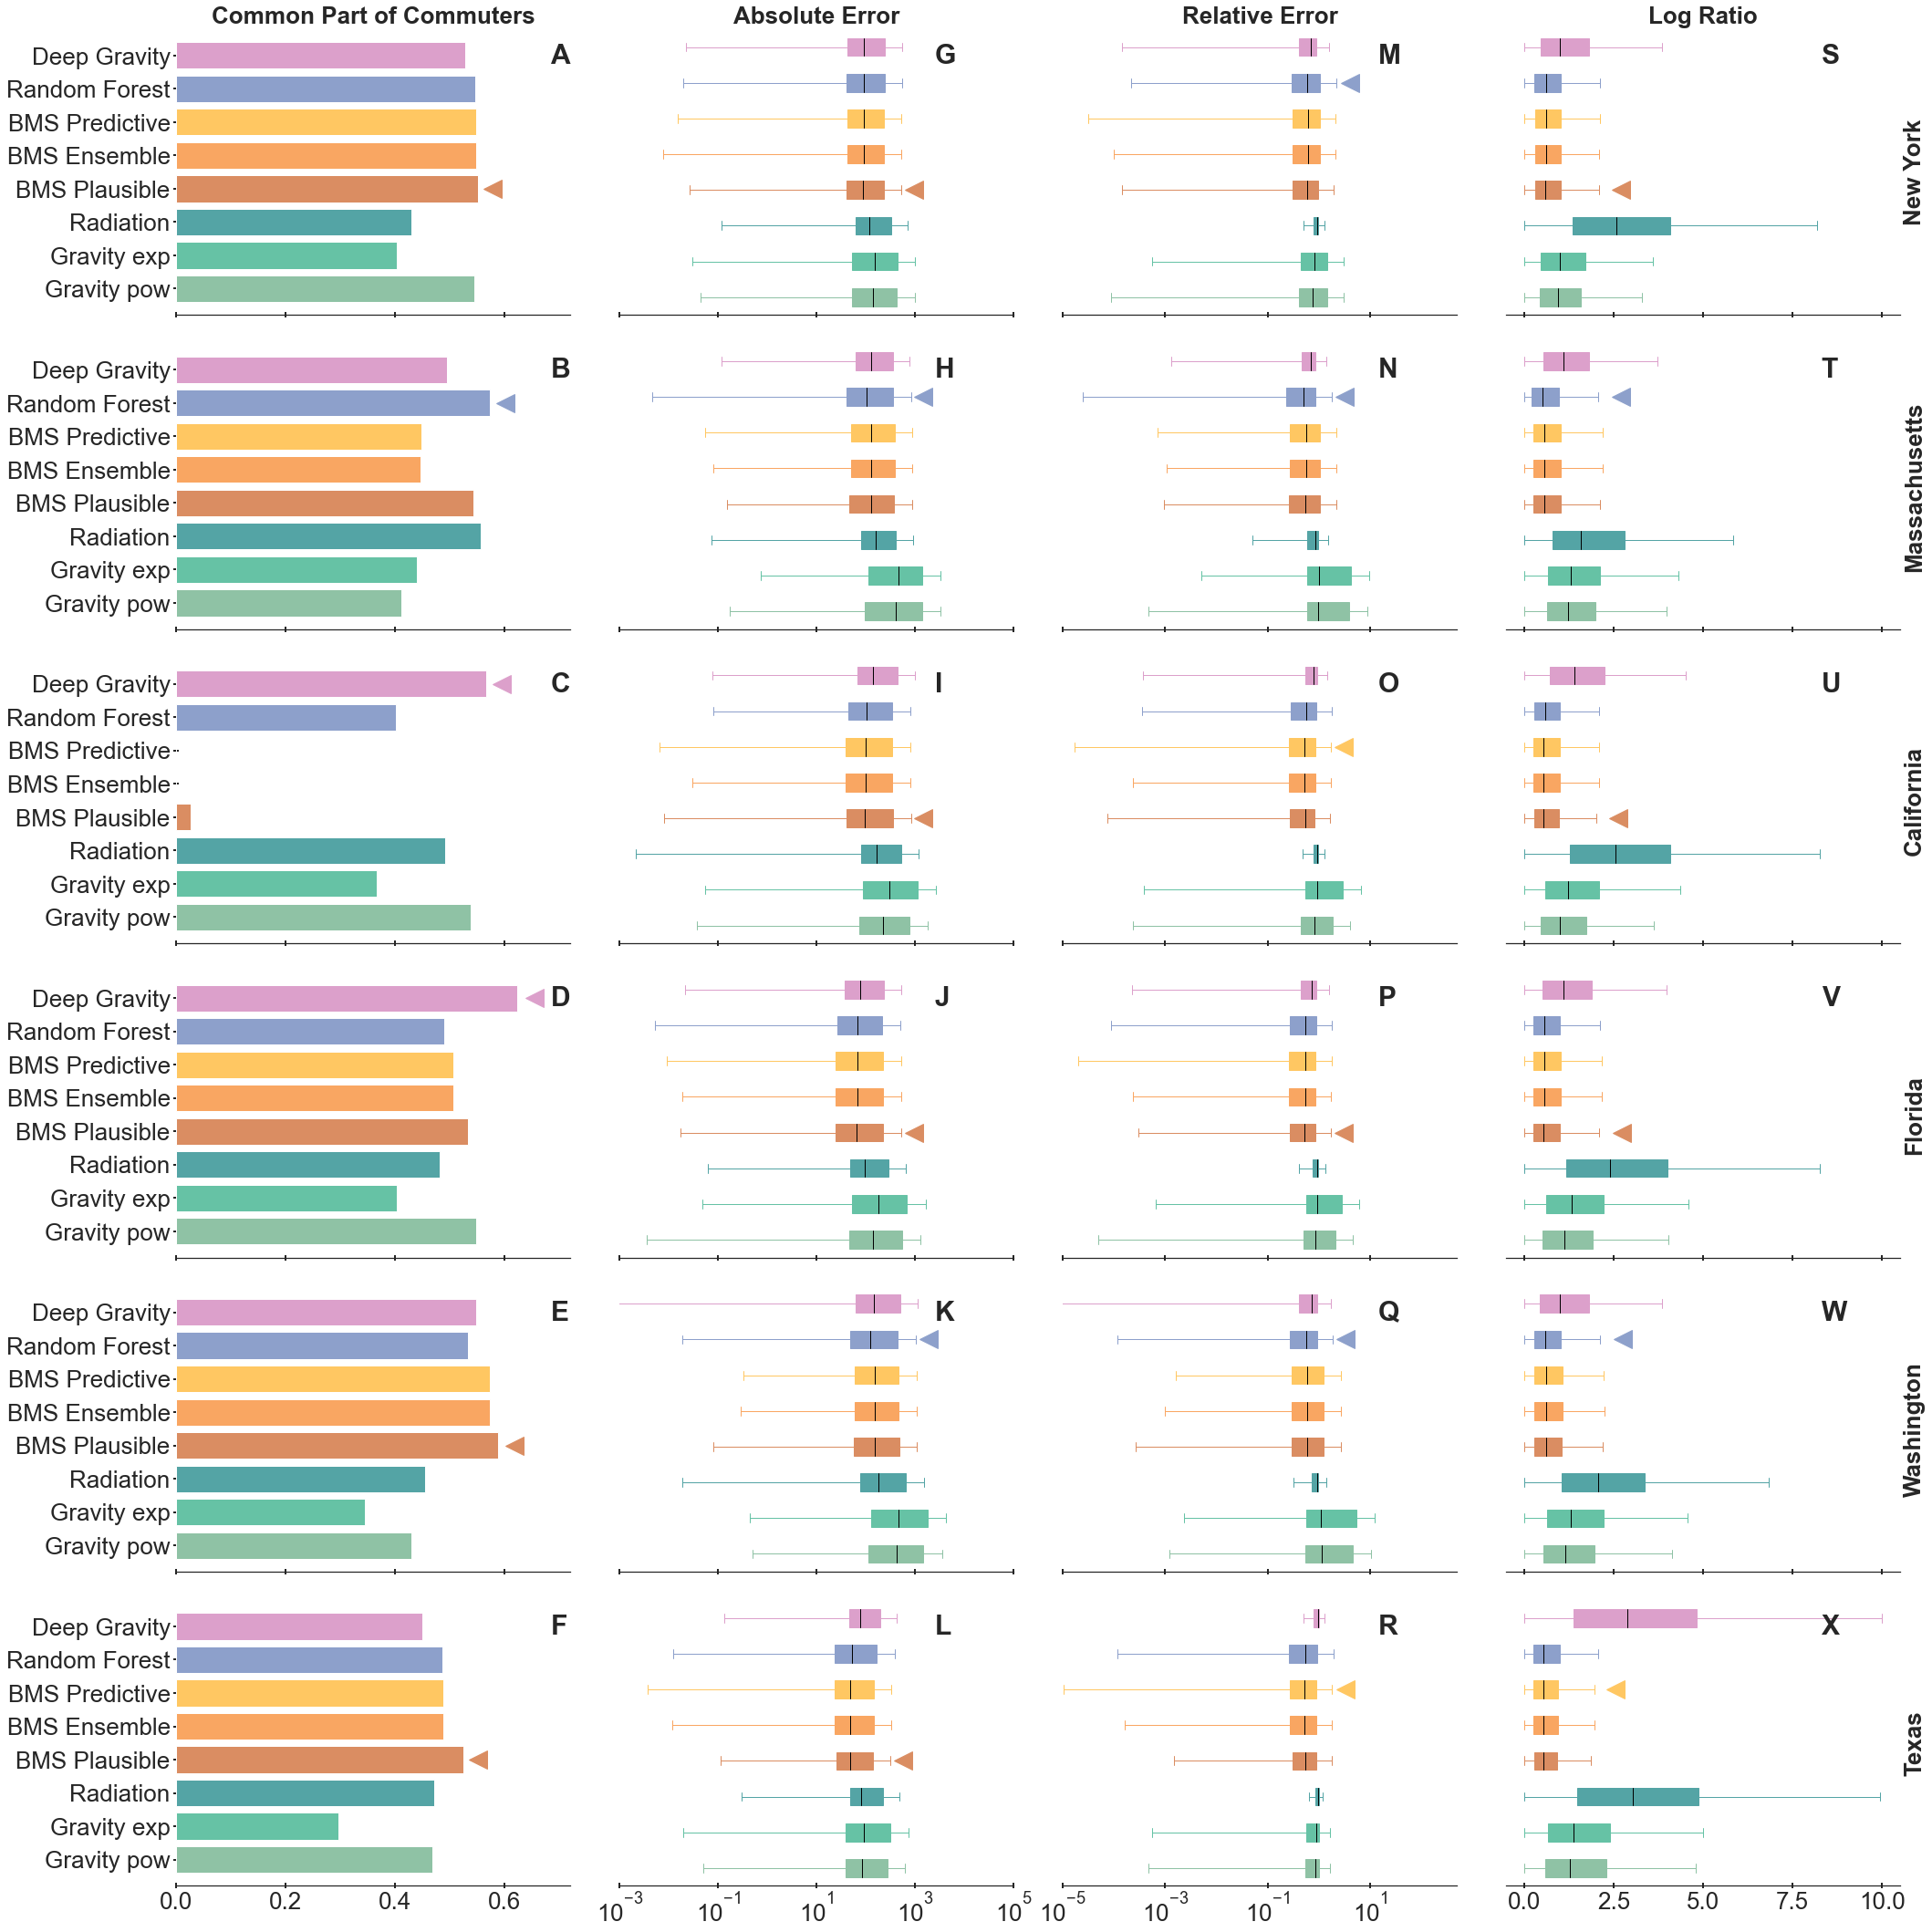

In [9]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def metrics_model_state_h_boxplot(_dict,df,metric,model,state,size=(30, 30),name=None):
    import matplotlib.cm as cm
    
    SMALL_SIZE = 26
    MEDIUM_SIZE = 26
    BIGGER_SIZE = 26
    #print(_dict,df)
    #print(metric,model)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in model]
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    #sbrn.set(style='ticks', font_scale=2)
    c_count=0
    fig, axs = plt.subplots(len(state),len(metric),figsize=size,sharex='col')
    for i,m in enumerate(metric):
        for j,s in enumerate(state):
            # Get de value for each model
            #print(m)
            if m=='CPC':
                x=[]
                for mdl in model:
                    try:
                        #cutoff
                    #    if float(df.loc[(mdl,m)][s])<1e5:
                        x+=[float(df.loc[(mdl,m)][s])]
                    #    else:
                    #        x+=[6e4]
                    except:
                        x+=[0.]
                # Adding bar plot to final subplot
                ind = np.arange(len(model))
                axs[j,i].barh(ind, x,color=colors)#bar_label(deepcopy(p1), label_type=None)
                if j==0 and m=='CPC':
                    axs[j,i].set_title('Common Part of Commuters', fontweight="bold")
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                axs[j,i].text(.95, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                axs[j,i].plot(max(x)+0.05*max(x),x.index(max(x)), marker="<",color=colors[x.index(max(x))], markersize=20)
                axs[j,i].set_xlim(right=0.72)
                c_count+=1
            else:
                x=[]
                for mod in model:
                    x.append(_dict[s][mod][m])
                box_dict=axs[j,i].boxplot(x,labels=model,vert=False,showfliers=False,patch_artist=True)
                for item in ['boxes', 'fliers']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color=color)
                for item in ['medians']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color='black')
                for item in ['means']:
                    for sub_item,color in zip(box_dict[item], colors):
                        sub_item.set_color('black')
                # whiskers and caps have to be treated separately since there are two of each for each plot
                for item in ['whiskers', 'caps']:
                    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                        plt.setp(sub_items, color=color)
                if i==len(metric)-1:
                    axs[j,i].set_ylabel(s, fontweight="bold")
                    axs[j,i].yaxis.set_label_position("right")
                    #axs[j,i].yaxis.tick_right()
                if j==0 and m=='RE':
                    axs[j,i].set_title('Relative Error', fontweight="bold")
                elif j==0 and m=='LogRatio':
                    axs[j,i].set_title('Log Ratio', fontweight="bold")
                elif j==0 and m=='AbsErr':
                    axs[j,i].set_title('Absolute Error', fontweight="bold")
                if i!=0:
                    axs[j,i].set_yticks([])
                ind = np.arange(len(model))+1
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                if m=='RE':
                    axs[j,i].set_xlim([1e-5,5e2])
                if m=='AbsErr':
                    axs[j,i].set_xlim([1e-3,1e5])
                    
                #    axs[j,i].text(.1, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                #elif m=='LogRatio':
                #    axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                #else:
                axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                c_count+=1
                if m=='RE' or m=='AbsErr':
                    axs[j,i].set_xscale('log')
                high_median=1e10
                high_model=0
                for k,mod in enumerate(model):
                    #print([k.get_xdata() for k in box_dict['caps']])
                    #print(box_dict)
                    if box_dict['medians'][k].get_xdata()[0]<high_median:
                        high_median=box_dict['medians'][k].get_xdata()[0]
                        high_model=k
                        high_model_y=round(box_dict['medians'][k].get_ydata()[0])
                        high_model_caps=box_dict['caps'][2*k+1].get_xdata()[0]
                        x_lims=axs[j,i].get_xlim()
                print(chars[c_count],high_median,high_model,high_model_y,x_lims,high_model_caps)
                #axs[j,i].plot(high_model_caps +0.05*high_model_caps,high_model_y, marker="^",transform=axs[j,i].get_yaxis_transform(),color=colors[high_model], markersize=20)
                if m=='RE' or m=='AbsErr':
                    x_marker=high_model_caps +0.8*high_model_caps
                else:
                    x_marker=high_model_caps +0.3*high_model_caps
                axs[j,i].plot(x_marker,high_model_y, marker="<",color=colors[high_model], markersize=20)
                
    plt.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    
    #return fig
#p.metrics_model_state_h(df_C_final,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #a['NewYork','Massachusetts','Florida','Washington','Texas'])
metrics_model_state_h_boxplot(error_models_C_final,df_C_final,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],states,name='./Plots/week1_fig_3_boxplot.pdf')

C 87.34528248715218 3 4 (0.001, 100000.0) 531.5034615585581
D 0.5969080387039825 6 7 (1e-05, 500.0) 2.252325098936346
E 0.6070192297979604 3 4 (-0.40881014955700595, 8.585693105627422) 2.085433174387222


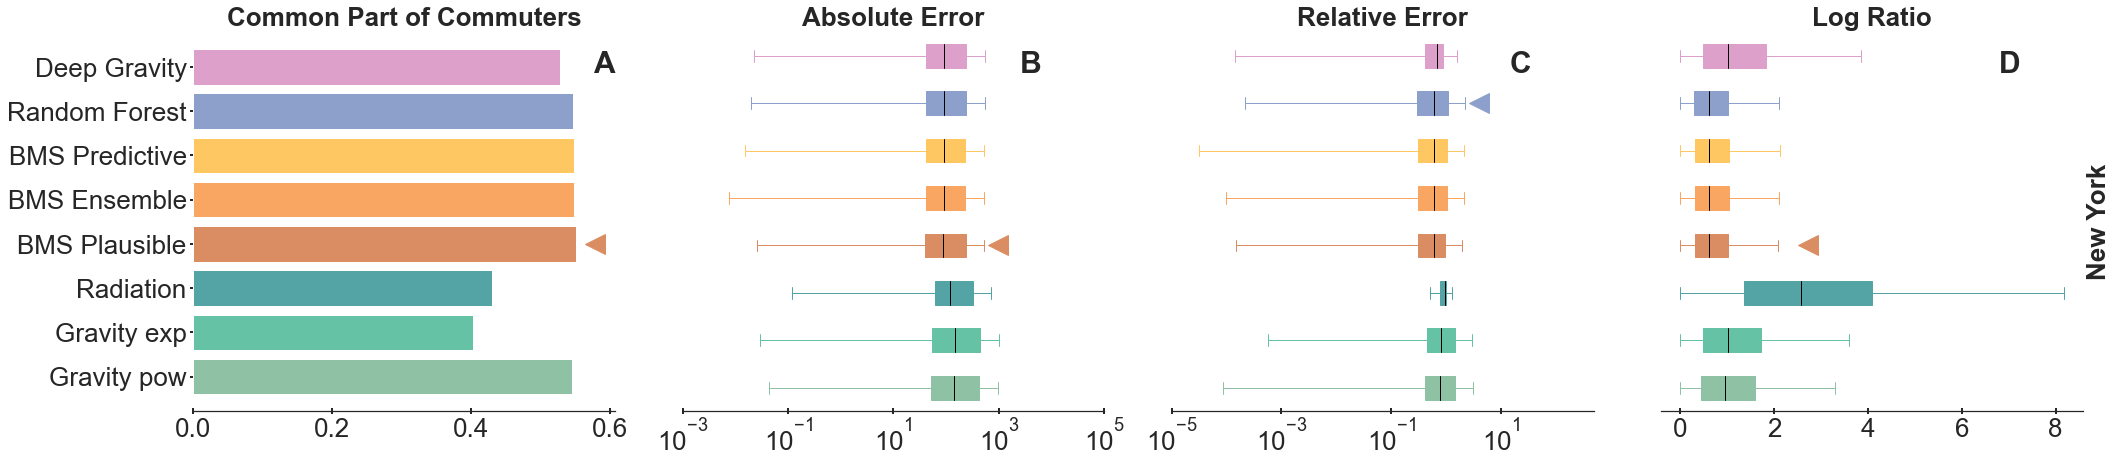

In [8]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def metrics_model_state_h_boxplot(_dict,df,metric,model,state,size=(30, 7),name=None):
    import matplotlib.cm as cm
    
    SMALL_SIZE = 26
    MEDIUM_SIZE = 26
    BIGGER_SIZE = 26
    #print(_dict,df)
    #print(metric,model)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in model]
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    #sbrn.set(style='ticks', font_scale=2)
    c_count=0
    fig, axs = plt.subplots(len(state),len(metric),figsize=size,sharex='col')
    for i,m in enumerate(metric):
        #for j,s in enumerate(state):
        # Get de value for each model
        #print(m)
        if m=='CPC':
            x=[]
            for mdl in model:
                try:
                    #cutoff
                #    if float(df.loc[(mdl,m)][s])<1e5:
                    x+=[float(df.loc[(mdl,m)][state[0]])]
                #    else:
                #        x+=[6e4]
                except:
                    x+=[0.]
            # Adding bar plot to final subplot
            ind = np.arange(len(model))
            axs[i].barh(ind, x,color=colors)#bar_label(deepcopy(p1), label_type=None)
            if m=='CPC':
                axs[i].set_title('Common Part of Commuters', fontweight="bold")
            if i==0: axs[i].set_yticks(ind, labels=model)
            axs[i].spines.right.set_visible(False)
            axs[i].spines.top.set_visible(False)
            axs[i].spines.left.set_visible(False)
            axs[i].tick_params(direction='inout', width=2)
            axs[i].text(.95, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            axs[i].plot(max(x)+0.05*max(x),x.index(max(x)), marker="<",color=colors[x.index(max(x))], markersize=20)
            c_count+=1
        else:
            x=[]
            for mod in model:
                x.append(_dict[state[0]][mod][m])
            box_dict=axs[i].boxplot(x,labels=model,vert=False,showfliers=False,patch_artist=True)
            for item in ['boxes', 'fliers']:
                for sub_item,color in zip(box_dict[item], colors):
                    plt.setp(sub_item, color=color)
            for item in ['medians']:
                for sub_item,color in zip(box_dict[item], colors):
                    plt.setp(sub_item, color='black')
            for item in ['means']:
                for sub_item,color in zip(box_dict[item], colors):
                    sub_item.set_color('black')
            # whiskers and caps have to be treated separately since there are two of each for each plot
            for item in ['whiskers', 'caps']:
                for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                    plt.setp(sub_items, color=color)
            if i==len(metric)-1:
                axs[i].set_ylabel(state[0], fontweight="bold")
                axs[i].yaxis.set_label_position("right")
                #axs[j,i].yaxis.tick_right()
            if m=='RE':
                axs[i].set_title('Relative Error', fontweight="bold")
            elif m=='LogRatio':
                axs[i].set_title('Log Ratio', fontweight="bold")
            elif m=='AbsErr':
                axs[i].set_title('Absolute Error', fontweight="bold")
            if i!=0:
                axs[i].set_yticks([])
            ind = np.arange(len(model))+1
            if i==0: axs[j,i].set_yticks(ind, labels=model)
            axs[i].spines.right.set_visible(False)
            axs[i].spines.top.set_visible(False)
            axs[i].spines.left.set_visible(False)
            axs[i].tick_params(direction='inout', width=2)
            if m=='RE':
                axs[i].set_xlim([1e-5,5e2])
            if m=='AbsErr':
                axs[i].set_xlim([1e-3,1e5])

            #    axs[j,i].text(.1, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
            #elif m=='LogRatio':
            #    axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
            #else:
            axs[i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
            c_count+=1
            if m=='RE' or m=='AbsErr':
                axs[i].set_xscale('log')
            high_median=1e10
            high_model=0
            for k,mod in enumerate(model):
                #print([k.get_xdata() for k in box_dict['caps']])
                #print(box_dict)
                if box_dict['medians'][k].get_xdata()[0]<high_median:
                    high_median=box_dict['medians'][k].get_xdata()[0]
                    high_model=k
                    high_model_y=round(box_dict['medians'][k].get_ydata()[0])
                    high_model_caps=box_dict['caps'][2*k+1].get_xdata()[0]
                    x_lims=axs[i].get_xlim()
            print(chars[c_count],high_median,high_model,high_model_y,x_lims,high_model_caps)
            #axs[j,i].plot(high_model_caps +0.05*high_model_caps,high_model_y, marker="^",transform=axs[j,i].get_yaxis_transform(),color=colors[high_model], markersize=20)
            if m=='RE' or m=='AbsErr':
                x_marker=high_model_caps +0.8*high_model_caps
            else:
                x_marker=high_model_caps +0.3*high_model_caps
            axs[i].plot(x_marker,high_model_y, marker="<",color=colors[high_model], markersize=20)
                
    plt.tight_layout()
    if name!=None:
        fig.savefig(name,format='svg')
    fig.show()
    
    #return fig
#p.metrics_model_state_h(df_C_final,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #a['NewYork','Massachusetts','Florida','Washington','Texas'])
#metrics_model_state_h_boxplot(error_models_C_final,df_C_final,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],states,name='./Plots/fig_3_boxplot.pdf')
metrics_model_state_h_boxplot(error_models_C_final,df_C_final,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],['New York'],name='./Plots/fig_3_boxplotPNG.svg')

In [5]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    #sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,17.5))#,sharey='col',sharex='col')
    plt.rc('font', family='Arial')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(4,6)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            t='test'
            if m=='Deep Gravity':
                t='testDG'
            axs[i,j].plot(_dict[state][t], _dict[state][m],'.',label=m, alpha=0.1,c=colors[i],rasterized=True)#bar_label(deepcopy(p1), label_type=None)
            if j==0: axs[i,j].set_ylabel(f'$\textbf{{m}}$')#, fontweight="bold")
            if i==0:
                axs[i,j].set_title(state, fontweight="bold")
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims,lw=2.5)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].text(.1, .9,chars[c_count], ha='left', va='top',size=30, transform=axs[i,j].transAxes, weight='bold')
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','BMS Plausible','Random Forest','Deep Gravity'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/week1_fig_2_scatter_plot.pdf')

NameError: name 'p' is not defined

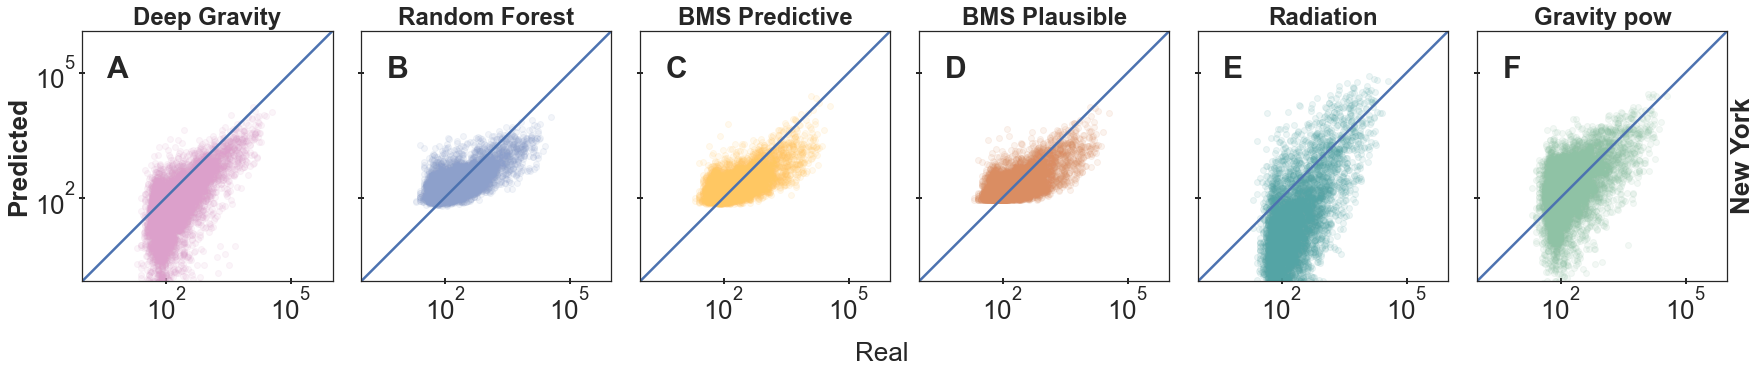

In [15]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    #sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(1,len(models),figsize=(25,5))#,sharey='col',sharex='col')
    plt.rc('font', family='Arial')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(1,6)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        #for j,state in enumerate(_dict.keys()):
        t='test'
        if m=='Deep Gravity':
            t='testDG'
        axs[i].scatter(_dict['New York'][t], _dict['New York'][m],label=m, alpha=0.1,c=[colors[i]])#bar_label(deepcopy(p1), label_type=None)
        #if j==0: axs[i].set_ylabel(, fontweight="bold")
        if i==0:
            axs[i].set_ylabel('Predicted', fontweight="bold")
        if i==len(models)-1:
            axs[i].set_ylabel('New York', fontweight="bold")
            axs[i].yaxis.set_label_position("right")
        axs[i].set_title(m, fontweight="bold")
        axs[i].tick_params(direction='inout', width=2)

        axs[i].set_yscale('log')
        axs[i].set_xscale('log')
        ratio = 1.0
        alpha=alpha-0.1
    #fig.legend(loc=5)
        xleft, xright = axs[i].get_xlim()
        ybottom, ytop = axs[i].get_ylim()
        minimum = np.min((axs[i].get_xlim(),axs[i].get_ylim()))
        maximum = np.max((axs[i].get_xlim(),axs[i].get_ylim()))
    #ax.set_xlim(minimum*1.2,maximum*1.2)
    #ax.set_ylim(minimum*1.2,maximum*1.2)
    #axs.plot((xleft, xright), (ybottom,ytop))
        axs[i].plot(lims, lims,lw=2.5)
        axs[i].tick_params(axis = 'both')
        #axs[i,j].xticks([])
        if list_ticks!=None:
            axs[i].set_xticks(list_ticks)
            axs[i].set_yticks(list_ticks)
        if i>0: axs[i].set_yticklabels([])
        #if i<len(models)-1: axs[i].set_xticklabels([])
        axs[i].set_xlim(lims)
        axs[i].set_ylim(lims)
        axs[i].text(.1, .9,chars[c_count], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
        axs[i].set(adjustable='box', aspect='equal')
        c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    if name!=None:
        fig.savefig(name,format='svg')
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','Radiation','BMS Plausible','BMS Predictive','Random Forest','Deep Gravity'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/week1_fig_2_scatter_plotPNG.svg')

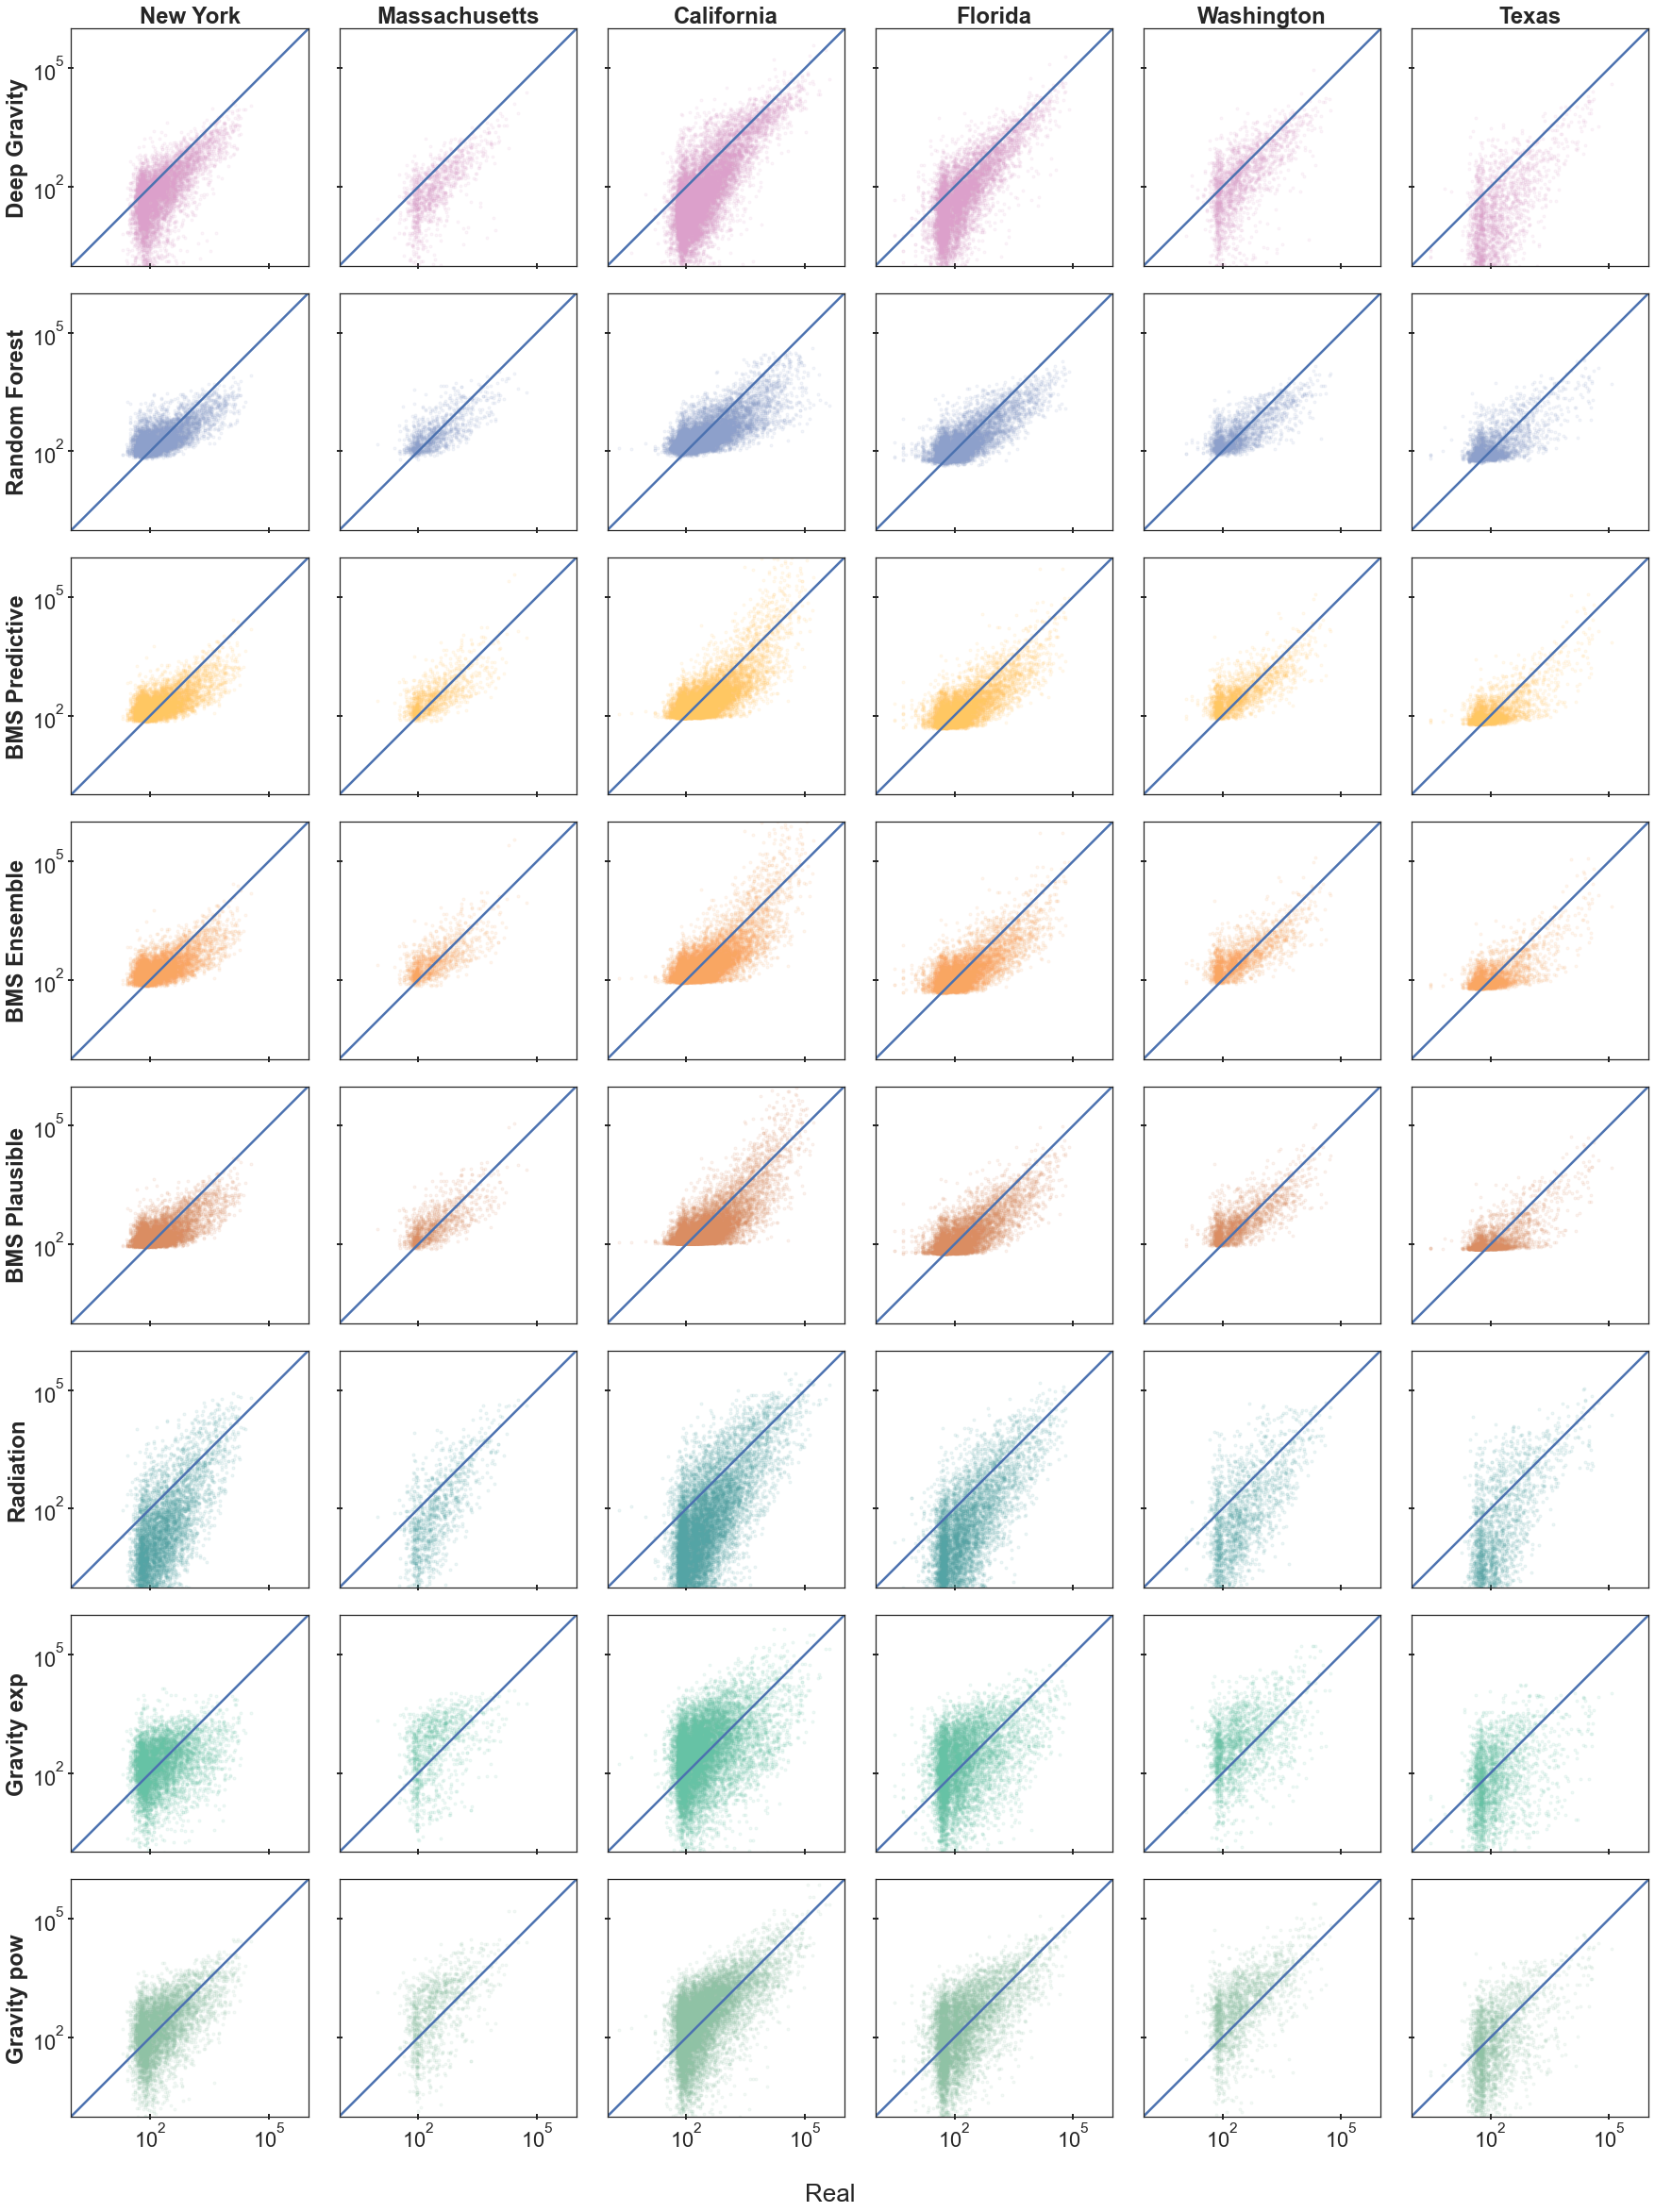

In [10]:
color_dict=p.color_dict
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    
    if mode=='A': colors = cm.autumn(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='B': colors = cm.winter(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='C': colors = cm.cool(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,33))#,sharey='col',sharex='col')
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(6,8)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            t='test'
            if m=='Deep Gravity':
                t='testDG'
            axs[i,j].plot(_dict[state][t], _dict[state][m],'.',label=m, alpha=0.1,c=colors[i],rasterized=True)#bar_label(deepcopy(p1), label_type=None)
            if j==0: axs[i,j].set_ylabel(m, fontweight="bold")
            if i==0:
                axs[i,j].set_title(state, fontweight="bold")
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims,lw=2.5)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/week1_SI_scatter_plot.pdf')

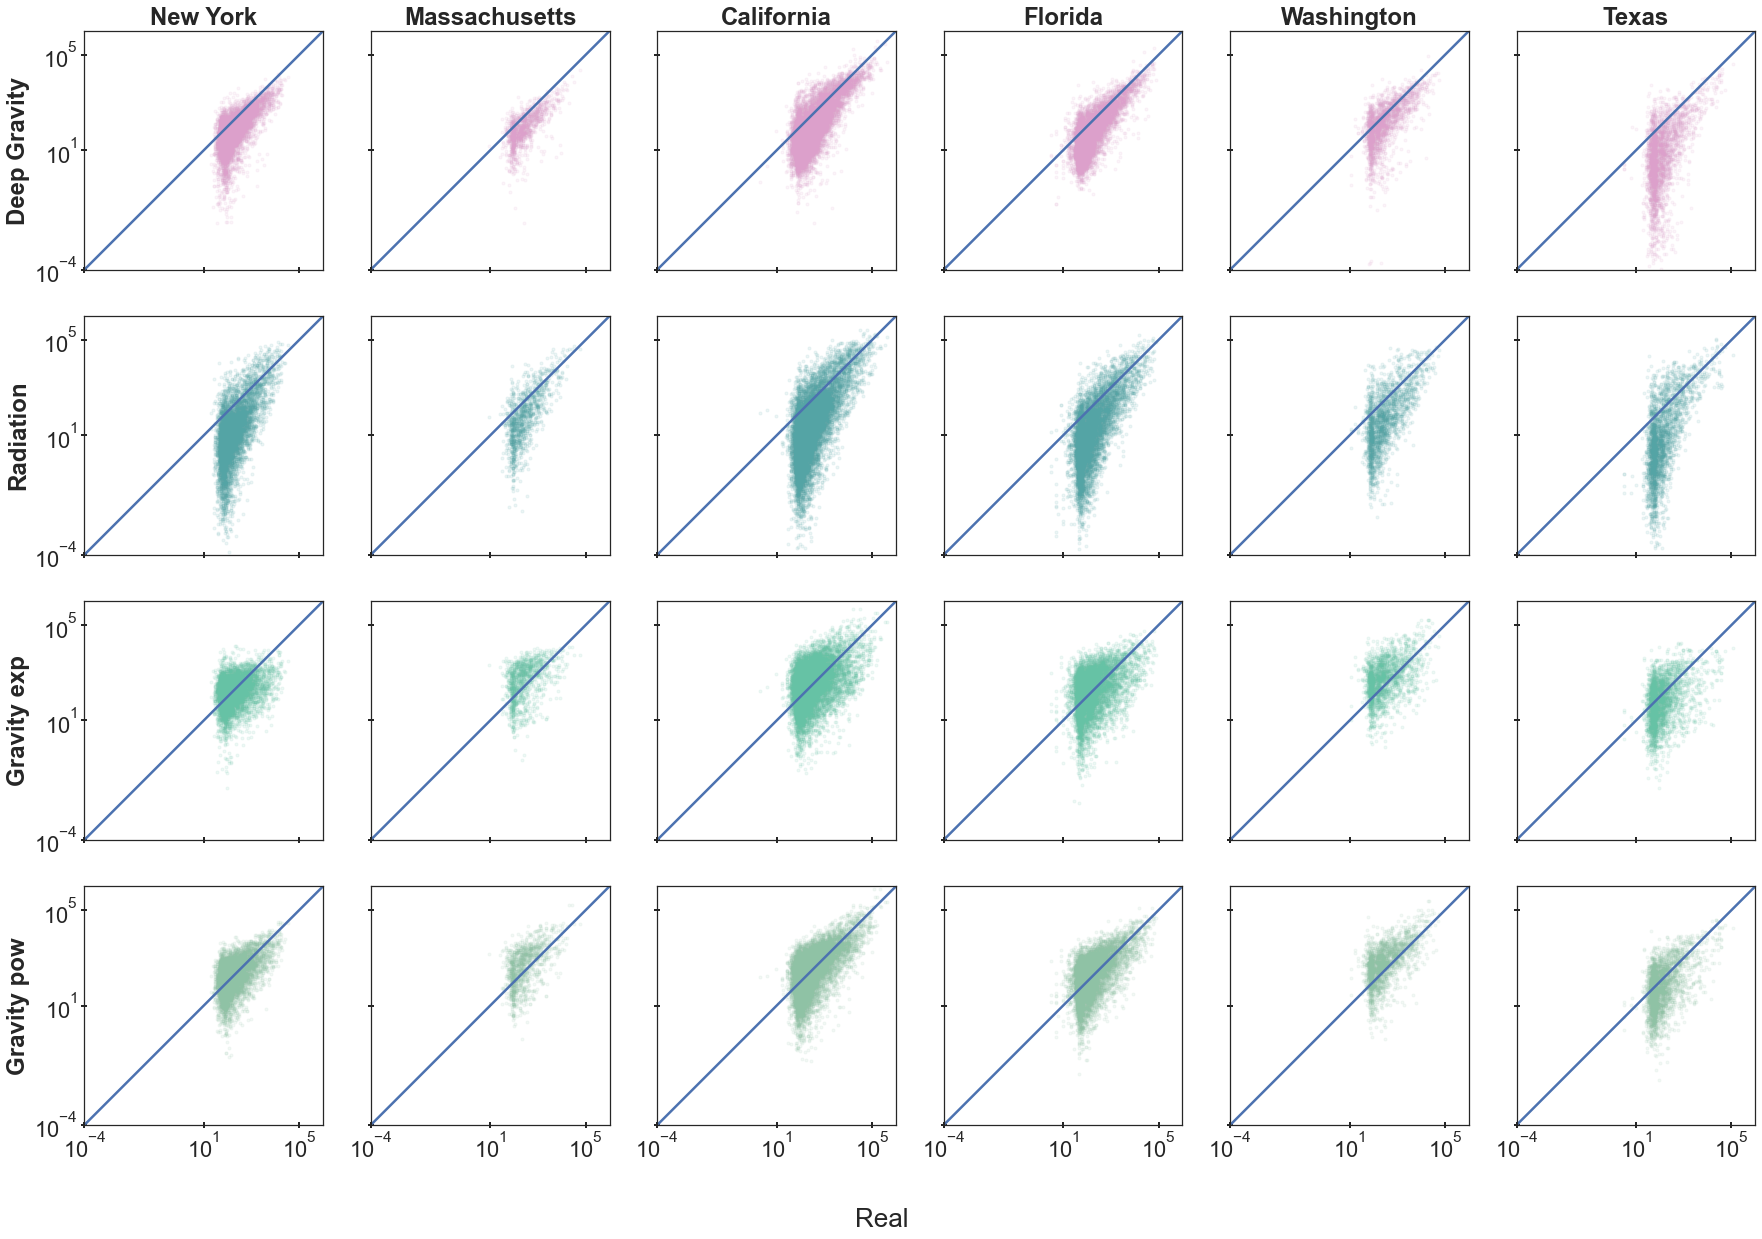

In [11]:
color_dict=p.color_dict
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    
    if mode=='A': colors = cm.autumn(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='B': colors = cm.winter(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='C': colors = cm.cool(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,17.5))#,sharey='col',sharex='col')
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(6,4)
    g.update(wspace=0.3, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            t='test'
            if m=='Deep Gravity':
                t='testDG'
            axs[i,j].plot(_dict[state][t], _dict[state][m],'.',label=m, alpha=0.1,c=colors[i],rasterized=True)#bar_label(deepcopy(p1), label_type=None)
            if j==0: axs[i,j].set_ylabel(m, fontweight="bold")
            if i==0:
                axs[i,j].set_title(state, fontweight="bold")
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims,lw=2.5)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf',dpi=300)
    fig.show()
    #return fig
predictions_state(scatter_models_C_final,'C',models=['Gravity pow','Gravity exp','Radiation','Deep Gravity'],
                 lims=(1e-4,1e6),list_ticks=[1e-4,1e1,1e5],name='./Plots/week1_SI_full_range.pdf')

# Power law interpretation

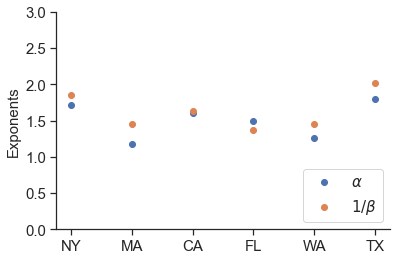

In [10]:
#alphas=[1.72*0.97, 1.174*1.775, 1.602*2.019, 1.489*1.325, 1.255*1.413, 1.8*1.158]
alphas=[1.72, 1.174, 1.602, 1.489, 1.255, 1.8]
_1_beta=[1./0.54, 1./0.6875, 1./0.6113, 1./0.7271,1./0.6888, 1./0.4955]

states=['New York','Massachusetts','California','Florida','Washington','Texas']

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='Arial')
plt.rcParams['font.family'] = 'Arial'
#sbrn.set(style='ticks', font_scale=2)


x=[0,1,2,3,4,5]
plt.xticks(x,['NY','MA','CA','FL','WA','TX'])
plt.ylabel('Exponents')
plt.scatter(x, alphas, label=r'$\alpha$')
plt.scatter(x, _1_beta,label=r'$1/\beta$')
plt.ylim([0,3])
plt.legend(loc='lower right')

ax = plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
#plt.text(.9, .9,'C', ha='left', va='top',size=30, transform=ax.transAxes, weight='bold')
plt.savefig('./Plots/alpha_beta.pdf',format='pdf',bbox_inches='tight',dpi=300)
plt.show()

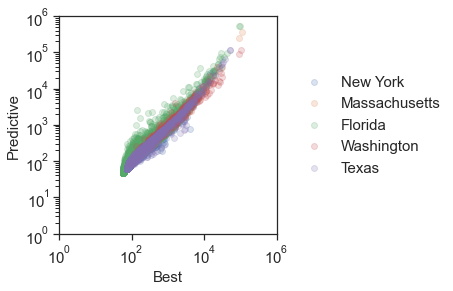

In [29]:

states=['New York','Massachusetts','Florida','Washington','Texas']

for s in states:
    plt.scatter(scatter_models_C_final[s]['BMS Plausible'],scatter_models_C_final[s]['BMS Predictive'],label=s,alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,1e6])
plt.ylim([1,1e6])
plt.xlabel('Best')
plt.ylabel('Predictive')
plt.legend(loc='center left',frameon=False,bbox_to_anchor=(1.04, 0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='Arial')
plt.rcParams['font.family'] = 'Arial'
plt.savefig('./Plots/scatter_Best_vs_Predictive.pdf',format='pdf', bbox_inches='tight')
plt.show()